In [20]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import datetime as dtimport matplotlib.pyplot as plt

## Procesamiento de datos

In [174]:
ruta_datasets = 'data/'

In [175]:
dataset_sube = pd.read_csv(ruta_datasets+'sube-2023.csv')
dataset_sube_regresion = pd.read_csv(ruta_datasets+'sube-2023-regresion.csv')

### Ejercicio 1

#### a)

Describimos el dataset

In [183]:
dataset_sube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


Transformamos la columna dia_transporte a datetime

In [184]:
dataset_sube['DIA_TRANSPORTE'] = pd.to_datetime(dataset_sube['DIA_TRANSPORTE'], format='%Y-%m-%d')

#### b)

##### i.

Creamos la columna fecha_dia con el nombre del día de la semana

In [185]:
def obtener_nombre_dia(fecha_dia):
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    return dias[fecha_dia.weekday()]

In [186]:
dataset_sube['FECHA_DIA'] = dataset_sube['DIA_TRANSPORTE'].apply(obtener_nombre_dia)

##### ii.

Creamos la columna fecha_ordinal donde asignamos el numero de día del año a cada fecha

In [187]:
dataset_sube['FECHA_ORDINAL'] = dataset_sube['DIA_TRANSPORTE'].dt.day_of_year

##### iii.

Creamos la columna fecha_mes con el numero de mes para cada fecha

In [188]:
dataset_sube['FECHA_MES'] = dataset_sube['DIA_TRANSPORTE'].dt.month

### Ejercicio 2

Creamos un dataframe que contiene solo los datos del AMBA y elimina los datos preliminares

In [189]:
datos_amba = dataset_sube[dataset_sube['AMBA']=='SI']
datos_amba = datos_amba[datos_amba['DATO_PRELIMINAR']=='NO']

Acomodamos el orden de las columnas y les corregimos el formato del nombre

In [190]:
datos_amba = datos_amba[['DIA_TRANSPORTE', 'FECHA_DIA', 'FECHA_MES','FECHA_ORDINAL', 'JURISDICCION', 'LINEA','CANTIDAD', 'TIPO_TRANSPORTE']]

In [193]:
datos_amba = datos_amba.rename(columns={"DIA_TRANSPORTE": "fecha", "FECHA_DIA": "fecha_dia","FECHA_MES" : "fecha_mes", "FECHA_ORDINAL":"fecha_ordinal","JURISDICCION": "jurisdiccion", "LINEA":'linea',"CANTIDAD":"pasajeros", "TIPO_TRANSPORTE": "tipo_transporte"})

Resultado final:

In [194]:
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Domingo,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Domingo,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Domingo,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Domingo,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


### Ejercicio 3

#### a)

Calculamos la proporcion de pasajeros por transporte en 2023

In [195]:
pasajeros_totales = sum(datos_amba['pasajeros'])

In [196]:
pasajeros_por_transporte = datos_amba.groupby('tipo_transporte')['pasajeros'].sum()

In [197]:
## ponerlo mas lindo. Signo %
proporcion_pasajeros = (pasajeros_por_transporte/pasajeros_totales)*100 
proporcion_pasajeros.round(1)

tipo_transporte
COLECTIVO    83.8
SUBTE         6.8
TREN          9.4
Name: pasajeros, dtype: float64

#### b)

Creamos un dataset con los datos del Subte, agrupamos por mes y linea, y obtenemos el valor maximo

In [198]:
datos_subte = datos_amba[datos_amba['tipo_transporte'] == 'SUBTE']
datos_subte = datos_subte[['fecha_mes','linea','pasajeros']]

In [199]:
datos_subte_mesLinea = datos_subte.groupby(['fecha_mes','linea'])['pasajeros'].sum()

In [200]:
mes_linea_maxPasajeros = pd.DataFrame(datos_subte_mesLinea).idxmax()

Tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

In [201]:
mes_linea_maxPasajeros.iloc[0]

(8, 'LINEA_B')

#### c)

Creamos el dataset solo con los días habiles, calculamos el desvío estandar para cada día y vemos el menor

In [202]:
dias_habiles = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
datos_amba_habiles = datos_amba[datos_amba['fecha_dia'].isin(dias_habiles)]

In [203]:
desvios = []
for dia_habil in dias_habiles:
    desvio_estandar = datos_amba_habiles[datos_amba_habiles['fecha_dia']==dia_habil]['pasajeros'].std().round(1)
    desvio_dia = (dia_habil, desvio_estandar)
    desvios.append(desvio_dia)
print(desvios)

[('Lunes', 33577.5), ('Martes', 35833.7), ('Miércoles', 35980.8), ('Jueves', 35968.3), ('Viernes', 35059.7)]


In [206]:
dia_menos_desvio = min(desvios, key=lambda x: x[1])
dia_menos_desvio[0]

'Lunes'

## Analisis exploratorio

### Ejercicio 4

- mediana, media, variacion, desvio estandar, promedio (.mean(), .std(), )
- cantidad de pasajeros por mes para cada transporte
- cantidad de pasajeros por provincia
- cantidad de pasajeros por año (sumar desde 2020)
- cantidad de pasajeros por municipio AMBA
- cantidad de pasajeros ?

In [34]:
#creo un nuevo DataFrame con todos los años
dataset_sube20 = pd.read_csv('data/dat-ab-usos-2020.csv')
dataset_sube21 = pd.read_csv('data/dat-ab-usos-2021.csv')
dataset_sube22 = pd.read_csv('data/dat-ab-usos-2022.csv')
df_concatenado = pd.concat([dataset_sube20,dataset_sube21,dataset_sube22,dataset_sube])

In [38]:
#Creo una columna que me separe los años
df_concatenado['DIA_TRANSPORTE'] = pd.to_datetime(df_concatenado['DIA_TRANSPORTE'], format='%Y-%m-%d')
df_concatenado['AÑO'] = df_concatenado['DIA_TRANSPORTE'].dt.year


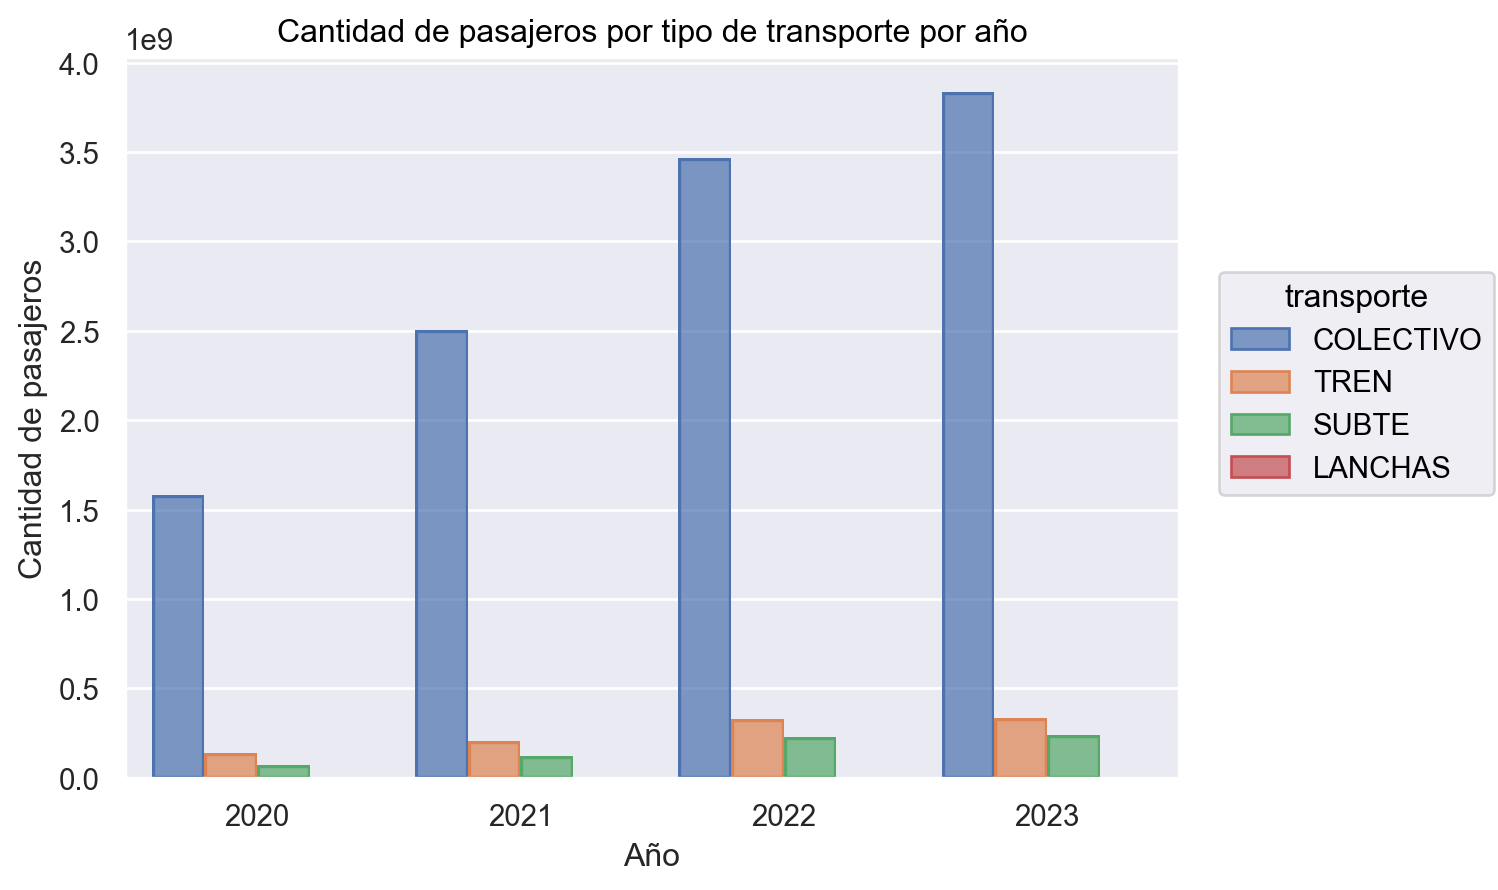

In [103]:
so.Plot(data=df_concatenado, x="AÑO", y="CANTIDAD", color = "TIPO_TRANSPORTE").add(so.Bar(), so.Agg("sum"), so.Dodge()).scale(x=so.Nominal()).label(title="Cantidad de pasajeros por tipo de transporte por año", x="Año", y="Cantidad de pasajeros", color= "transporte" )


En este grafico podemos ver que el uso del transporte publico incrementa año tras año, si bien hay que tener en cuenta que en el año 2020 el uso de este bajo abruptamente debido a la pandemia de COVID-19, la cual se extendio hacia inicios del 2021 en muchos sectores. Las oficinas al igual que los establecimientos educativos adoptaron modos de trabajo virtual, lo que consecuentemente hizo que la poblacion tenga que salir menos de sus casas y por lo tanto tomar menos colectivos, subtes, trenes y lanchas. A partir del 2022 se ve un fuerte incremento del uso de dichos transportes con la pandemia ya dejada de lado, es probable que con los incrementos de los costos de mantener un vehiculo propio en los proximos años sigan subiendo los numeros de pasajeros.

## Modelado

### Ejercicio 5